In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# View first row of data for measurement table
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f85e1345280>,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [10]:
# View first row of data for station table
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f85f2f2ad30>,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
first_date = session.query(Measurement.date).\
    group_by(Measurement.date).\
    order_by(Measurement.date.desc()).first()
first_date

('2017-08-23',)

2016-08-23


array([   0,  200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000,
       2200])

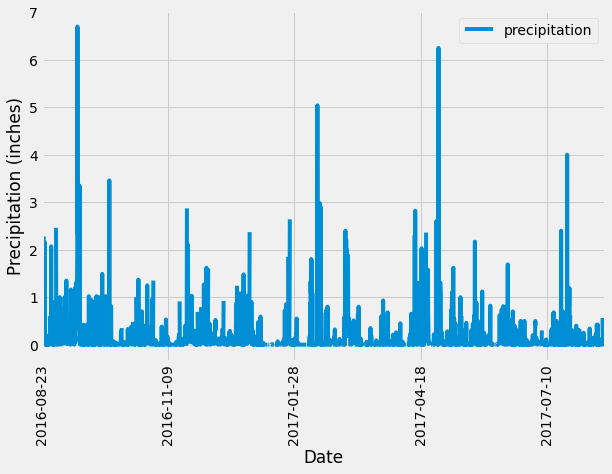

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).all()
precipitation

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation,columns=['date','precipitation'])
precipitation_df.set_index(['date'],inplace=True)

# Sort the dataframe by date
precipitation_df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(kind='line',rot=90,figsize=(9,6));
plt.ylabel('Precipitation (inches)');
plt.xlabel('Date');
plt.legend(loc='upper right');
plt.xlim(0,len(precipitation_df))

x_axis = np.arange(0,len(precipitation_df),200)
x_axis\\\\


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement).group_by(Measurement.station).count()

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.prcp)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.prcp).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Lowest temperature
min_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').first()

# Highest temperature
max_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').first()

# Average temperature
mean_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').first()

# Print
print(f'Min temp: {min_temp}, Max temp: {max_temp}, Mean temp: {mean_temp}')

Min temp: (54.0,), Max temp: (85.0,), Mean temp: (71.66378066378067,)


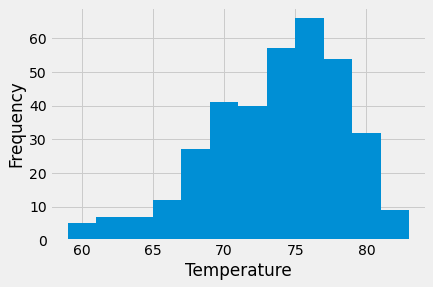

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_date_9281 = session.query(Measurement.date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.desc()).first()


year_ago_9281 = dt.date(2017,8,18) - dt.timedelta(days=365)

temps_9281 = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date >= '2016-08-18').\
    filter(Measurement.station == 'USC00519281').all()


temps_9281_df = pd.DataFrame(temps_9281,columns=['date','temperature'])
temps_9281_df['temperature'].hist(bins=12);
plt.ylabel('Frequency');
plt.xlabel('Temperature');

# Close session

In [ ]:
# Close Session
session.close()